In [1]:
import pandas as pd
import numpy as np

In [2]:
#import data
df = pd.read_csv('meteorite_data.csv', low_memory=True)
df.head()

,Unnamed: 0,name,id,name_type,rec_class,mass,fall,year,rec_lat,rec_long,geo_location,location_type
0,0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,NaN,Exact
1,1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,NaN,Exact
2,2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,NaN,Exact
3,3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,NaN,Exact
4,4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,NaN,Exact


In [3]:
df= df.drop(columns=['Unnamed: 0', 'geo_location'],axis=1)

df = df[(df['rec_long']<=180) & (df['rec_long']>=-180) ]
df = df[(df['rec_lat']!= 0) | (df['rec_long']!= 0)]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44146 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           44146 non-null  object 
 1   id             44146 non-null  int64  
 2   name_type      44146 non-null  object 
 3   rec_class      44146 non-null  object 
 4   mass           44026 non-null  float64
 5   fall           44146 non-null  object 
 6   year           43875 non-null  float64
 7   rec_lat        44146 non-null  float64
 8   rec_long       44146 non-null  float64
 9   location_type  44146 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.7+ MB


In [5]:
df.shape

(44146, 10)

In [6]:
df.isnull().sum()

name               0
id                 0
name_type          0
rec_class          0
mass             120
fall               0
year             271
rec_lat            0
rec_long           0
location_type      0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

name             0
id               0
name_type        0
rec_class        0
mass             0
fall             0
year             0
rec_lat          0
rec_long         0
location_type    0
dtype: int64

In [8]:
df.shape

(43764, 10)

In [9]:
df.describe()

,id,mass,year,rec_lat,rec_long
count,43764.000000,4.376400e+04,43764.000000,43764.000000,43764.000000
mean,26607.171122,1.375845e+04,1991.484371,-45.504941,65.126957
std,16949.100868,5.868123e+05,33.469478,48.711161,84.988200
min,1.000000,0.000000e+00,-2101.000000,-87.366670,-165.433330
25%,12274.750000,7.307500e+00,1987.000000,-83.250000,11.783053
50%,23823.500000,3.241500e+01,1998.000000,-72.000000,54.127405
75%,40450.250000,2.030000e+02,2003.000000,19.525405,157.166670
max,57458.000000,6.000000e+07,2013.000000,81.166670,179.383333


<Axes: ylabel='Frequency'>

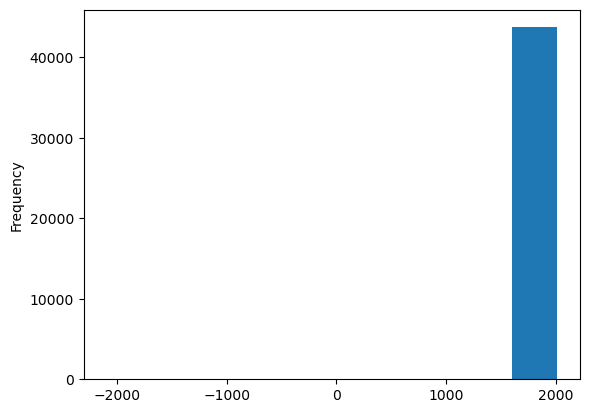

In [10]:
df['year'].plot.hist()

In [11]:
# Check if years are negative, positive, 0, or null
year_data = df['year']
positive = year_data.gt(0).sum()
negative = year_data.lt(0).sum()
zero = year_data.eq(0).sum()
null = year_data.isnull().sum()
positive, negative, zero, null

pd.DataFrame({'positive': [positive], 'negative': [negative], 'zero': [zero], 'null': [null], 
              'total': [positive + negative + zero + null], 'expected total': [len(year_data)]})

,positive,negative,zero,null,total,expected total
0,43762,2,0,0,43764,43764


In [12]:
odd_dates = df[(df['year'] < 860) | (df['year'] > 2016)]
odd_dates

,name,id,name_type,rec_class,mass,fall,year,rec_lat,rec_long,location_type
30679,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,-2101.0,29.295239,-6.554735,Guessed
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,-601.0,49.416670,21.700000,Exact


In [13]:
#drop above rows

df = df.drop(index=[30679, 38301])

In [14]:
# df['year'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

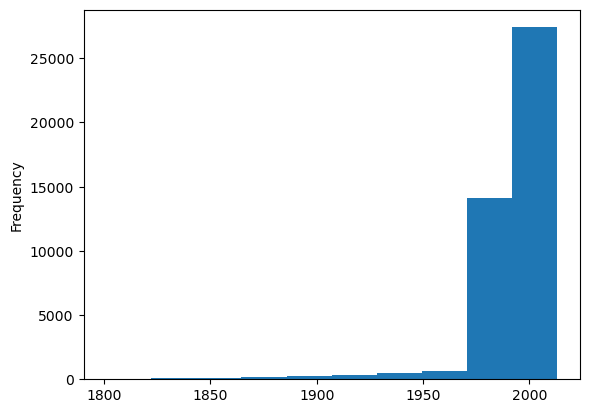

In [15]:
df = df[df['year'] >= 1800]

df['year'].plot.hist()

In [16]:
# #drop meteorites that fell before 1970

# df = df[df['year'] >= 1970]

# #check distriburion again

# df['year'].plot.hist(bins=45)

In [17]:
#check shape again
df.shape

(43715, 10)

In [18]:
#filter to only US data

north = 49.382808
south = 24.521208
east = -66.945392
west = -124.736342

# Filter based on latitude
df = df[(df['rec_lat'] < north) & (df['rec_lat'] > south)]

# Filter based on longitude
df = df[(df['rec_long'] > west) & (df['rec_long'] < east)]

# Print the filtered DataFrame
print(df)


             name     id name_type          rec_class       mass   fall  \
28        Allegan   2276     Valid                 H5    32000.0   Fell   
29        Allende   2278     Valid                CV3  2000000.0   Fell   
34        Andover   2295     Valid                 L6     3200.0   Fell   
46         Archie   2329     Valid                 H6     5070.0   Fell   
49      Ash Creek  48954     Valid                 L6     9500.0   Fell   
...           ...    ...       ...                ...        ...    ...   
45689   Yucca 017  57159     Valid                 H5      200.0  Found   
45693      Zaffra  30383     Valid       Iron, IAB-MG     3000.0  Found   
45697  Zapaliname  30392     Valid       Iron, IAB-MG    85000.0  Found   
45703       Zenda  30400     Valid  Iron, IAB complex     3700.0  Found   
45715  Zulu Queen  30414     Valid               L3.7      200.0  Found   

         year   rec_lat   rec_long location_type  
28     1899.0  42.53333  -85.88333         Exact

In [19]:
#map rec_class to Stony, Stony-iron, and iron
class_dic = {
    #Stony
    'H5': 'Stony', 'H6':'Stony', 'H': 'Stony', 'H4': 'Stony', 'H4-an': 'Stony', 
    'L6': 'Stony', 'LL6': 'Stony', 'L3': 'Stony', 'L4': 'Stony', 'L5': 'Stony', 'L': 'Stony',
    'LL4': 'Stony', 'L/LL4': 'Stony', 'L/LL6': 'Stony', 'L3.7': 'Stony', 'L3': 'Stony', 
    'LL5': 'Stony', 'L3.4':'Stony', 'L3.6': 'Stony', 'L3.5': 'Stony', 'L3.5-5':'Stony', 'L3.2': 'Stony', 
    'LL3': 'Stony', 'L3-6': 'Stony', 'L5-7': 'Stony', 'LL3.1':'Stony', 'LL3.3':"stony", 'LL3.4': 'Stony', 'L/LL3.4':'Stony',
    'LL3.7': 'Stony', 'H3': 'Stony', 'H3.4': 'Stony', 'H3-6': 'Stony', 'H4-an': 'Stony', 'H4-6': 'Stony', 'H3.5': 'Stony','H3.7': 'Stony', 
    'H3-5': 'Stony', 'H3.6': 'Stony', 'H3.8': 'Stony', 'H3.9':'Stony', 'H3.10': 'Stony', 
    'H3-4': 'Stony', 'H4/5': 'Stony', 'H4/6': 'Stony', 'H5-6': 'Stony', 'H(5?)': 'Stony',
    'H-melt rock': 'Stony', 'H?': 'Stony', 'H/L4': 'Stony','H-metal': 'Stony','EL6': 'Stony', 
    'EL6/7': 'Stony', 'EH4/5': 'Stony', 'CM2': 'Stony', 'CM1': 'Stony', 'CO3.3': 'Stony', 
    'CO3.7': 'Stony', 'CO3.0': 'Stony', 'CO3': 'Stony', 'CV3': 'Stony', 'CK3': 'Stony', 
    'CK4': 'Stony', 'CK5': 'Stony', 'CR': 'Stony', 'C2-ung': 'Stony', 'C4-ung': 'Stony', 
    'C': 'Stony', 'CBa': 'Stony','R3-6': 'Stony', 'K3': 'Stony', 'Winonaite': 'Stony', 'OC': 'Stony', 
    'Martian (nakhlite)': 'Stony', 'Ureilite': 'Stony', 'Eucrite-mmict': 'Stony', 
    'Eucrite': 'Stony', 'Eucrite-cm': 'Stony', 'Eucrite-pmict': 'Stony', 'Howardite': 'Stony', 
    'Diogenite': 'Stony', 'Diogenite-pm': 'Stony', 'Aubrite': 'Stony', 'Aubrite-an': 'Stony', 
    'Acapulcoite': 'Stony', 'L/LL5': 'Stony', 'L/LL6':'Stony', 'L4-6': 'Stony', 'L5/6': 'Stony', 'L6/7': 'Stony',
    'L-imp melt': 'Stony', 

    #Stony-iron
    'Pallasite, PMG': 'Stony_iron', 'Mesosiderite-A3/4': 'Stony_iron', 
    'Pallasite, PMG-an': 'Stony_iron', 'Pallasite': 'Stony_iron', 
    'Pallasite, PES': 'Stony_iron', 'Pallasite, ungrouped': 'Stony_iron', 
    'Mesosiderite': 'Stony_iron', 'Mesosiderite-A3': 'Stony_iron', 
    'Mesosiderite-A2': 'Stony_iron', 'Mesosiderite-A1': 'Stony_iron', 
    'Mesosiderite-B4': 'Stony_iron',

    #Iron
    'Iron, IIIAB':'Iron', 'Iron, IVA':'Iron', 'Iron':'Iron', 
    'Iron, IAB-sLL':'Iron', 'Iron, IAB-ung': 'Iron', 'Iron, IIAB': 'Iron', 
    'Iron, IAB complex': 'Iron', 'Iron, IAB-sHL': 'Iron', 'Iron, IAB-sLM': 'Iron', 
    'Iron, IC': 'Iron', 'Iron, IIE-an': 'Iron', 'Iron, IAB-MG': 'Iron', 
    'Iron, IIG': 'Iron', 'Iron, ungrouped': 'Iron', 'Iron, IID': 'Iron', 
    'Iron, IIIE': 'Iron', 'Iron, IIIF': 'Iron', 'Iron, IAB-sLH': 'Iron', 
    'Iron, IIF': 'Iron', 'Iron, IVB': 'Iron', 'Iron, IIIAB?':'Iron', 
    'Iron, IAB-an': 'Iron', 'Iron, IIC':'Iron', 'Iron, IIE': 'Iron', 
    'Iron, IAB-sHH': 'Iron',
}
df['rec_class'] = df['rec_class'].map(class_dic)
df

,name,id,name_type,rec_class,mass,fall,year,rec_lat,rec_long,location_type
28,Allegan,2276,Valid,Stony,32000.0,Fell,1899.0,42.53333,-85.88333,Exact
29,Allende,2278,Valid,Stony,2000000.0,Fell,1969.0,26.96667,-105.31667,Exact
34,Andover,2295,Valid,Stony,3200.0,Fell,1898.0,44.61667,-70.75000,Exact
46,Archie,2329,Valid,Stony,5070.0,Fell,1932.0,38.50000,-94.30000,Exact
49,Ash Creek,48954,Valid,Stony,9500.0,Fell,2009.0,31.80500,-97.01000,Exact
...,...,...,...,...,...,...,...,...,...,...
45689,Yucca 017,57159,Valid,Stony,200.0,Found,2011.0,34.81923,-114.27735,Exact
45693,Zaffra,30383,Valid,Iron,3000.0,Found,1919.0,35.00000,-94.75000,Exact
45697,Zapaliname,30392,Valid,Iron,85000.0,Found,1998.0,25.00944,-100.75000,Exact
45703,Zenda,30400,Valid,Iron,3700.0,Found,1955.0,42.51333,-88.48944,Exact


In [20]:
df.rec_class.unique()

array(['Stony', 'Iron', 'Stony_iron', 'stony'], dtype=object)

In [21]:
df.to_csv('cleaned_meteorite_data.csv', index=False)